# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
graduates = pd.read_csv('data/graduates.csv')
score_board = pd.read_csv('data/score_board.csv')

In [3]:
print(graduates.isnull().any())
print(score_board.isnull().any())

id           False
graduated    False
dtype: bool
id                 False
year               False
gpa                False
maths_exam         False
art_exam           False
language_exam      False
social_activity    False
essay_score        False
interview_score    False
score              False
accepted           False
dtype: bool


In [4]:
df = pd.merge(score_board, graduates, on='id', how='left')
df[['graduated']] = df[['graduated']].fillna(value=False)
df.head(6)

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted,graduated
0,CS-1980-00001,1980,1.674275,0.082557,0.084508,0.008007,4,0.091328,0.012596,276,False,False
1,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True,False
2,CS-1980-00003,1980,1.500251,0.075756,0.002541,0.216737,3,0.008463,0.001737,276,False,False
3,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True,True
4,CS-1980-00005,1980,2.884417,0.396614,0.478490,0.180828,3,0.638742,0.182141,554,False,False
5,CS-1980-00006,1980,3.115015,0.505209,0.154452,0.989376,5,0.996864,0.903852,675,False,False


In [5]:
df = df.dropna(how='any')

df['graduated'] = df['graduated'].replace(False, 0)
df.head(6)

,id,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,accepted,graduated
0,CS-1980-00001,1980,1.674275,0.082557,0.084508,0.008007,4,0.091328,0.012596,276,False,0.0
1,CS-1980-00002,1980,3.743429,0.898700,0.978949,0.937879,4,0.991515,0.999604,857,True,0.0
2,CS-1980-00003,1980,1.500251,0.075756,0.002541,0.216737,3,0.008463,0.001737,276,False,0.0
3,CS-1980-00004,1980,3.047625,0.993001,0.950673,0.763701,5,0.996858,0.949954,841,True,1.0
4,CS-1980-00005,1980,2.884417,0.396614,0.478490,0.180828,3,0.638742,0.182141,554,False,0.0
5,CS-1980-00006,1980,3.115015,0.505209,0.154452,0.989376,5,0.996864,0.903852,675,False,0.0


In [6]:
df.describe()

,year,gpa,maths_exam,art_exam,language_exam,social_activity,essay_score,interview_score,score,graduated
count,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000,46478.000000
mean,1998.823680,2.749776,0.567661,0.566245,0.564037,2.997268,0.587991,0.588620,627.208593,0.102091
std,10.551211,0.722317,0.342000,0.340899,0.341505,1.410028,0.387963,0.388413,204.736171,0.302772
min,1980.000000,1.500020,0.000132,0.000033,0.000056,1.000000,0.000003,0.000010,89.000000,0.000000
25%,1990.000000,2.122802,0.231938,0.234131,0.232634,2.000000,0.157416,0.156790,468.000000,0.000000
50%,2000.000000,2.752711,0.630916,0.624387,0.618879,3.000000,0.723635,0.723814,638.000000,0.000000
75%,2007.000000,3.374218,0.902174,0.900198,0.899342,4.000000,0.970727,0.971542,785.000000,0.000000
max,2016.000000,3.999989,0.999921,0.999956,0.999977,5.000000,0.999997,0.999996,1115.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)

In [8]:
train['graduated'].value_counts()

0.0    37595
1.0     4235
Name: graduated, dtype: int64

In [9]:
ones = train[train.graduated == 1]
zeros = train[train.graduated == 0]
zeros = zeros.sample(int(ones.shape[0]*1.1))
dfa = pd.concat([ones, zeros])
dfa = dfa.sample(frac=1).reset_index(drop=True)

In [10]:
def prepare(df):
    df = dfa.copy()
    df['scoreXgpa'] = df['gpa']*df['score']
    df['examsXgpa'] = (df['maths_exam']+df['art_exam']+df['language_exam'])*df['gpa']
    df['scoresXgpa'] = (df['essay_score']+df['interview_score'])*df['gpa']
    df = df.drop(columns=['id', 'year', 'accepted', 'social_activity'])
    df = df.drop(columns=['maths_exam', 'art_exam', 'language_exam', 'essay_score', 'interview_score'])
    return df

df = prepare(dfa)

In [11]:
df.sample(5)

,gpa,score,graduated,scoreXgpa,examsXgpa,scoresXgpa
3516,2.307456,546,0.0,1259.871187,2.235598,0.177141
3143,3.759843,803,0.0,3019.153816,10.990359,7.509268
8383,2.319504,566,0.0,1312.839404,4.085828,4.461525
5036,3.496702,706,0.0,2468.671274,6.709861,6.986493
3688,3.939839,1017,1.0,4006.816085,8.455069,7.789573


In [12]:
df.corr()['graduated'].sort_values(ascending=False)

graduated     1.000000
scoreXgpa     0.695663
examsXgpa     0.682980
scoresXgpa    0.673336
gpa           0.670829
score         0.634327
Name: graduated, dtype: float64

# Train

In [13]:
import xgboost as xgb
model = xgb.XGBClassifier(max_depth=3, learning_rate=0.05)

In [14]:
train_y = df[['graduated']]
train_X = df.drop(columns=['graduated'])

In [24]:
train_X.columns

Index(['gpa', 'score', 'scoreXgpa', 'examsXgpa', 'scoresXgpa'], dtype='object')

In [15]:
model.fit(train_X, train_y.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Test

In [16]:
test_dataset = prepare(test)

In [17]:
test_y = test_dataset[['graduated']]
test_X = test_dataset.drop(columns=['graduated'])

In [18]:
pred = model.predict(test_X)

# Evaluate

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.8539300573484764

In [20]:
counts = test_y['graduated'].value_counts()
print(counts)
print(counts[0]/(counts[0]+counts[1]))

0.0    4658
1.0    4235
Name: graduated, dtype: int64
0.523782750477904


In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, test_X.values, test_y.values.ravel(), cv=5)

array([0.85722316, 0.84204609, 0.85103991, 0.84251969, 0.84645669])

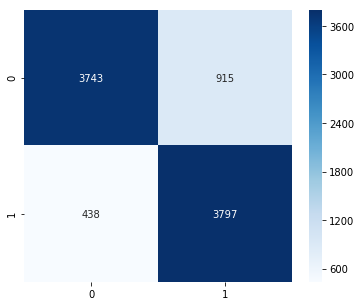

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, test_X.values, test_y.values.ravel(), cv=5)
conf = confusion_matrix(test_y, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')

# Save

In [26]:
from sklearn.externals import joblib
joblib.dump(model, 'app/model.joblib.data')

['app/model.joblib.data']